### Tetrode data

In [1]:
from pathlib import Path
import spikeinterface.full as si

%matplotlib widget

In [2]:
#base_data_folder = Path("/home/samuel/DataSpikeSorting/data_cns_lyon_2025/")
#working_folder = Path("/home/samuel/DataSpikeSorting/data_cns_lyon_2025/results")

base_data_folder = Path("/home/pierre/data/gdr/bordeaux/raw_datas/")
working_folder = Path("/home/pierre/data/gdr/bordeaux/results")

recording_name = "1544_2023-04-21_09-55-34_of"

results_folder = working_folder / recording_name

In [3]:
recording = si.read_openephys(base_data_folder / recording_name, stream_name='Signals CH')

In [4]:
recording

OpenEphysLegacyRecordingExtractor: 16 channels - 30.0kHz - 1 segments - 66,593,792 samples 
                                   2,219.79s (37.00 minutes) - int16 dtype - 1.98 GiB

In [5]:
recording_processed = si.bandpass_filter(recording, freq_max=5000, dtype='float32')
#recording_processed = si.common_reference(recording_processed)

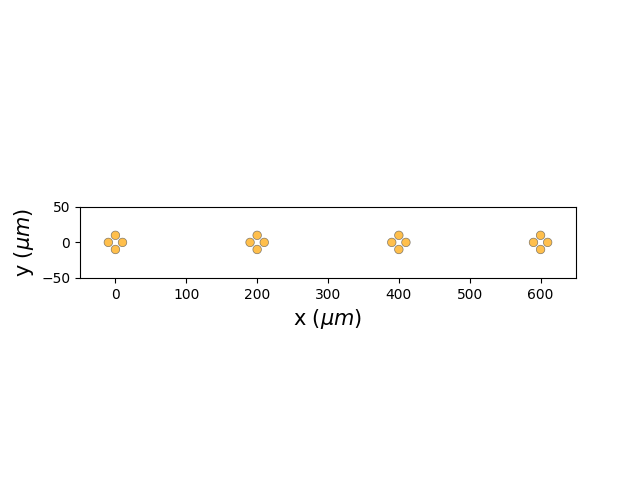

In [18]:
import probeinterface as pi
import probeinterface.plotting
import numpy as np
from probeinterface import generate_tetrode

probegroup = pi.ProbeGroup()
for i in range(4):
    tetrode = generate_tetrode()
    tetrode.move([i * 200, 0])
    probegroup.add_probe(tetrode)
probegroup.set_global_device_channel_indices(np.arange(16))
pi.plotting.plot_probegroup(probegroup, with_contact_id=True, same_axes=True)

In [19]:
recording_processed = recording_processed.set_probegroup(probegroup)

In [20]:
si.set_global_job_kwargs(n_jobs=0.8)
sorting_SC2 = si.run_sorter(sorter_name="spykingcircus2", recording=recording_processed, 
                           folder=working_folder / recording_name / "sorter_SC2",
                           verbose=True, remove_existing_folder=True, apply_preprocessing=False, apply_motion_correction=False)

Skipping preprocessing (whitening only)


noise_level (workers: 16 processes):   0%|          | 0/20 [00:00<?, ?it/s]

write_memory_recording (workers: 16 processes):   0%|          | 0/2220 [00:00<?, ?it/s]

get protoype waveforms (workers: 16 processes):   0%|          | 0/2220 [00:00<?, ?it/s]

detect peaks (matched_filtering) 
engine=process - n_jobs=16 - samples_per_chunk=30,000 - chunk_memory=1.83 MiB - total_memory=29.30 MiB - chunk_duration=1.00s


detect peaks (matched_filtering) (workers: 16 processes):   0%|          | 0/2220 [00:00<?, ?it/s]

Kept 100000 peaks for clustering


Fit peaks svd (workers: 16 processes):   0%|          | 0/2220 [00:00<?, ?it/s]

Transform peaks svd (workers: 16 processes):   0%|          | 0/2220 [00:00<?, ?it/s]

split_clusters with local_feature_clustering:   0%|          | 0/16 [00:00<?, ?it/s]

Kept 18 clean clusters
find spikes (circus-omp) 
engine=process - n_jobs=16 - samples_per_chunk=30,000 - chunk_memory=1.83 MiB - total_memory=29.30 MiB - chunk_duration=1.00s


/home/pierre/github/spikeinterface/src/spikeinterface/core/baserecordingsnippets.py:242: UserWarning: There is no Probe attached to this recording. Creating a dummy one with contact positions
  warn("There is no Probe attached to this recording. Creating a dummy one with contact positions")
/home/pierre/github/spikeinterface/src/spikeinterface/core/baserecordingsnippets.py:242: UserWarning: There is no Probe attached to this recording. Creating a dummy one with contact positions
  warn("There is no Probe attached to this recording. Creating a dummy one with contact positions")


find spikes (circus-omp) (workers: 16 processes):   0%|          | 0/2220 [00:00<?, ?it/s]

Found 1222217 spikes


/home/pierre/github/spikeinterface/src/spikeinterface/core/sortinganalyzer.py:497: UserWarning: The Recording is not serializable! The recording link will be lost for future load
  warnings.warn("The Recording is not serializable! The recording link will be lost for future load")


Kept 18 units after final merging
spykingcircus2 run time 149.99s


In [21]:
analyzer = si.create_sorting_analyzer(sorting_SC2, recording_processed)
analyzer.compute({
    "random_spikes" : {},
    "templates": {},
    "waveforms": {},
    "noise_levels": {},
    "correlograms": {},
    "noise_levels": {},
    "spike_amplitudes": {},
    "spike_locations": {},
    "template_metrics": {},
    "unit_locations": {},
    "template_similarity": {},
    "quality_metrics": {},
})

ERROR! Session/line number was not unique in database. History logging moved to new session 3477


estimate_sparsity (workers: 16 processes):   0%|          | 0/2220 [00:00<?, ?it/s]

compute_waveforms (workers: 16 processes):   0%|          | 0/2220 [00:00<?, ?it/s]

Compute : spike_amplitudes + spike_locations (workers: 16 processes):   0%|          | 0/2220 [00:00<?, ?it/s]

/home/pierre/.virtualenvs/sorting/lib/python3.13/site-packages/numpy/_core/_methods.py:223: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/pierre/.virtualenvs/sorting/lib/python3.13/site-packages/numpy/_core/_methods.py:181: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/pierre/.virtualenvs/sorting/lib/python3.13/site-packages/numpy/_core/_methods.py:215: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


In [22]:
from spikeinterface_gui import run_mainwindow
run_mainwindow(
    analyzer,
    mode="desktop"
)

qt.core.qobject.connect: QObject::connect(QStyleHints, QStyleHints): unique connections require a pointer to member function of a QObject subclass
qt.core.qobject.connect: QObject::connect(QStyleHints, QStyleHints): unique connections require a pointer to member function of a QObject subclass
qt.core.qobject.connect: QObject::connect(QStyleHints, QStyleHints): unique connections require a pointer to member function of a QObject subclass
qt.core.qobject.connect: QObject::connect(QStyleHints, QStyleHints): unique connections require a pointer to member function of a QObject subclass
qt.core.qobject.connect: QObject::connect(QStyleHints, QStyleHints): unique connections require a pointer to member function of a QObject subclass
qt.core.qobject.connect: QObject::connect(QStyleHints, QStyleHints): unique connections require a pointer to member function of a QObject subclass
qt.core.qobject.connect: QObject::connect(QStyleHints, QStyleHints): unique connections require a pointer to member fu

<spikeinterface_gui.backend_qt.QtMainWindow(0x3a0000f0) at 0x7c60b1183f00>